# Exemplo Prático: Workflow IA

## Classificação de Flores Íris

O objetivo nessa prática é apresentar o workflow básico pra criação de um modelo inteligente para solucionar um problema de classificação. Desta forma, vamos realizar, passo a passo, as quatro principais etapas do processo: Extração de atributos, Divisão dos dados, Treinamento do modelo e Avaliação do modelo.

In [8]:
pip install matplotlib


In [43]:
# Carregar e entender os dados

# biblioteca para carregar e realizar operações tabulares
import pandas as pd

# biblioteca para plotar gráficos
import matplotlib.pyplot as plt 


# dataset, arquivo com os dados sobre a covid19 nas cisdades do BR
arquivo  = 'cases-brazil-cities.csv'

# carregando o conteúdo do arquivo em um objeto pandas.DataFrame
# a partir do método de carregamento de arquivo read_csv
# especificando que a primeira linha contém os nomes do cabeçalho
dataset = pd.read_csv(arquivo, sep=',')
cols = ['deaths','ibgeID', 'totalCases', 'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants', 'deaths_by_totalCases', 'newCases',
        'newDeaths']
dataset[cols] = dataset[cols].apply(pd.to_numeric, errors='coerce').fillna(0.0)
dataset = dataset[dataset['newCases'] > 0]


# exibindo a dimensão dos dados carregados (linhas, colunas)
dataset.shape

(2128, 14)

In [44]:
# exibindo as 10 primeiras linhas de valores contidos no dataset
dataset.head(10)
# exibindo os 10 últimas linhas de valores do dataset
#dataset.tail(10)

,country,state,city,ibgeID,deaths,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,_source,date,newCases,newDeaths,last_info_date
0,Brazil,GO,Abadia de Goiás/GO,5200050,50,4074,545.97074,44485.69557,0.01227,MS,2023-03-18,5,0,2023-03-18
3,Brazil,PA,Abaetetuba/PA,1500107,244,12009,152.08272,7485.08779,0.02032,MS,2023-03-18,13,0,2023-03-18
11,Brazil,SC,Abelardo Luz/SC,4200101,70,2752,388.56508,15276.15876,0.02544,MS,2023-03-18,18,0,2023-03-18
13,Brazil,PE,Abreu e Lima/PE,2600054,261,6031,259.19085,5989.19542,0.04328,MS,2023-03-18,64,0,2023-03-18
18,Brazil,CE,Acaraú/CE,2300200,121,8162,190.38328,12842.21789,0.01482,MS,2023-03-18,7,0,2023-03-18
20,Brazil,PA,Acará/PA,1500206,46,2559,82.52009,4590.62859,0.01798,MS,2023-03-18,7,1,2023-03-18
22,Brazil,RS,Aceguá/RS,4300034,8,1172,160.61032,23529.41176,0.00683,MS,2023-03-18,1,0,2023-03-18
25,Brazil,AC,Acrelândia/AC,1200013,40,3481,254.43674,22142.35736,0.01149,MS,2023-03-18,2,0,2023-03-18
26,Brazil,GO,Acreúna/GO,5200134,85,6620,374.28446,29150.15412,0.01284,MS,2023-03-18,9,0,2023-03-18
27,Brazil,SP,Adamantina/SP,3500105,190,11547,540.49441,32847.83660,0.01645,MS,2023-03-18,17,0,2023-03-18


In [45]:
# para acesssar uma linha aleatória
dataset.iloc[23] #linha especifica
dataset.sample() #linha aleatoria

,country,state,city,ibgeID,deaths,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,_source,date,newCases,newDeaths,last_info_date
3355,Brazil,BA,Nova Redenção/BA,2922854,10,410,109.57703,4492.65834,0.02439,MS,2023-03-18,25,0,2023-03-18


In [46]:
# para saber a quantidade mortes por estado
dataset.groupby('state')['deaths'].sum().sort_values(ascending=False)



state
SP    161223
RJ     76132
PR     40412
RS     40039
GO     26304
CE     25220
BA     22666
PE     20126
SC     15449
PA     15266
ES     14381
AM     13355
MS      9334
PB      7480
RO      6665
MA      6116
PI      5678
AL      5225
RN      5155
SE      2940
TO      2124
RR      1992
AP      1963
AC      1773
Name: deaths, dtype: int64

In [47]:
# para obter um resumo estatístico dos dados
dataset.describe()

,ibgeID,deaths,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,newCases,newDeaths
count,2.128000e+03,2128.000000,2.128000e+03,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000
mean,3.381040e+06,247.658835,1.233223e+04,304.591573,21705.543461,0.016185,28.586936,0.123120
std,1.064771e+06,1433.340433,4.745153e+04,336.621822,13221.958138,0.009888,265.661759,1.462546
min,1.100015e+06,0.000000,8.000000e+01,0.000000,1024.189250,0.000000,1.000000,-24.000000
25%,2.602506e+06,19.000000,1.564000e+03,195.240322,13249.050075,0.010295,1.000000,0.000000
50%,3.520566e+06,50.000000,3.601000e+03,278.287100,20839.791945,0.013865,3.000000,0.000000
75%,4.216629e+06,133.250000,8.945250e+03,377.066377,28620.935043,0.019112,12.000000,0.000000
max,5.222302e+06,44671.000000,1.316242e+06,14039.978650,337540.779410,0.133700,10164.000000,52.000000


In [48]:
dataset = dataset.drop(columns=['ibgeID', '_source', 'date', 'last_info_date','deaths_by_totalCases'])

In [49]:
dataset.rename(columns={'deaths_per_100k_inhabitants': 'deaths/100k_habitants', 'totalCases_per_100k_inhabitants': 'total_Cases/100k_habitants'}, inplace=True)
dataset.head(5)

,country,state,city,deaths,totalCases,deaths/100k_habitants,total_Cases/100k_habitants,newCases,newDeaths
0,Brazil,GO,Abadia de Goiás/GO,50,4074,545.97074,44485.69557,5,0
3,Brazil,PA,Abaetetuba/PA,244,12009,152.08272,7485.08779,13,0
11,Brazil,SC,Abelardo Luz/SC,70,2752,388.56508,15276.15876,18,0
13,Brazil,PE,Abreu e Lima/PE,261,6031,259.19085,5989.19542,64,0
18,Brazil,CE,Acaraú/CE,121,8162,190.38328,12842.21789,7,0


In [50]:
dataset.shape

(2128, 9)

In [52]:
duplicate_rows_df = dataset[dataset.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 9)


In [53]:
dataset.count()

country                       2128
state                         2128
city                          2128
deaths                        2128
totalCases                    2128
deaths/100k_habitants         2128
total_Cases/100k_habitants    2128
newCases                      2128
newDeaths                     2128
dtype: int64

In [54]:
print(dataset.isnull().sum())  # Verifica valores nulos em cada coluna

country                       0
state                         0
city                          0
deaths                        0
totalCases                    0
deaths/100k_habitants         0
total_Cases/100k_habitants    0
newCases                      0
newDeaths                     0
dtype: int64


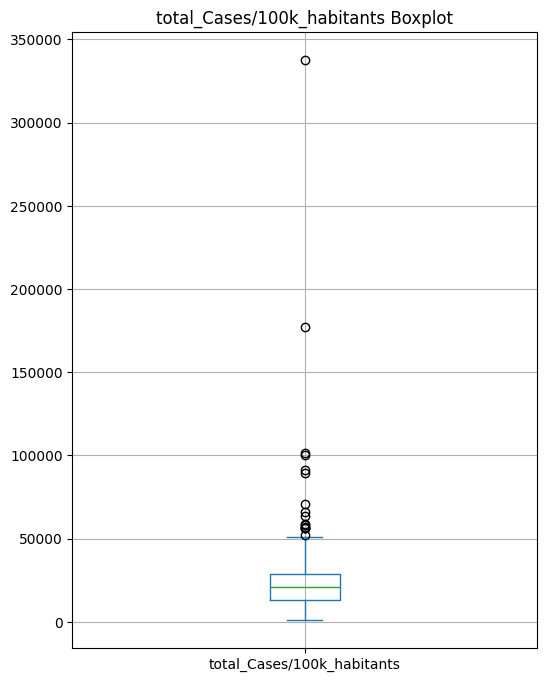

In [55]:
dataset['total_Cases/100k_habitants'].plot.box(figsize=(6,8), grid=True, vert=True, title='total_Cases/100k_habitants Boxplot')

plt.show()

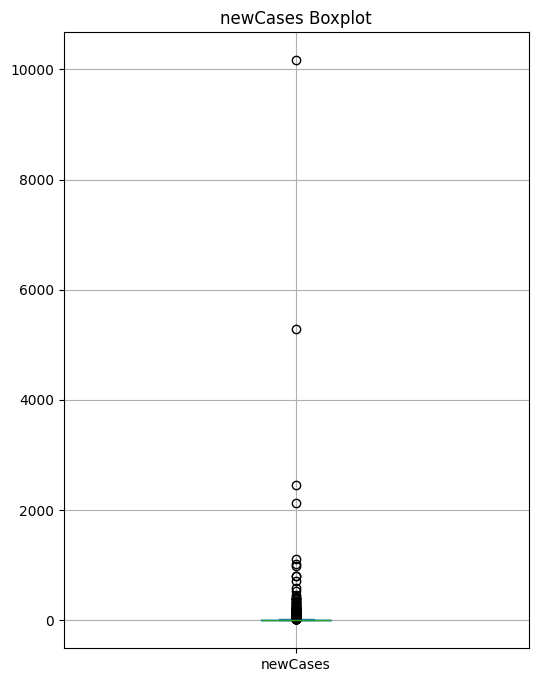

In [56]:
dataset['newCases'].plot.box(figsize=(6,8), grid=True, vert=True, title='newCases Boxplot')

plt.show()

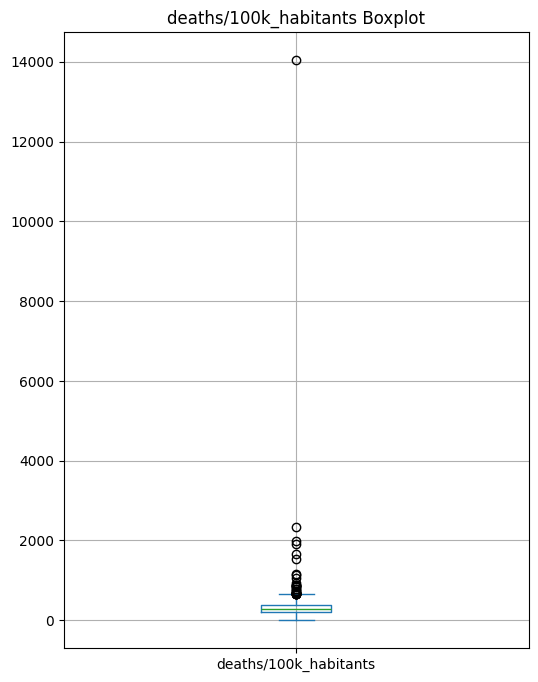

In [57]:
dataset['deaths/100k_habitants'].plot.box(figsize=(6,8), grid=True, vert=True, title='deaths/100k_habitants Boxplot')

plt.show()

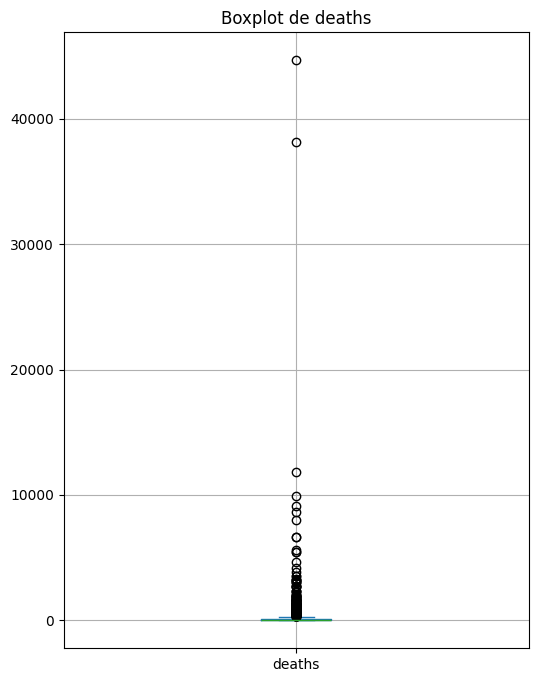

In [58]:
# exibindo um gráfico do tipo 'boxplot' 
dataset['deaths'].plot.box(figsize=(6,8), grid=True, vert=True, title='Boxplot de deaths')

plt.show()

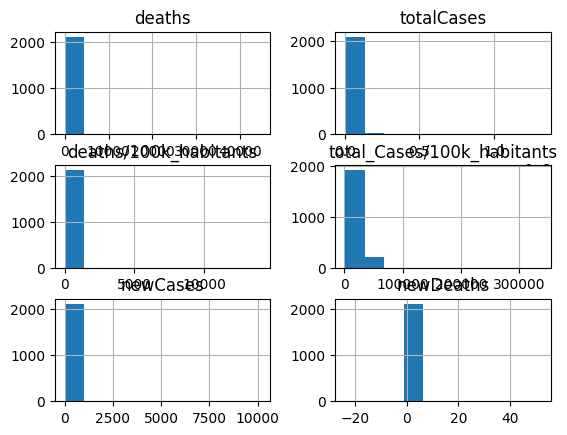

In [59]:
# exibindo um gráfico de histogramas para entender a distribuição dos mesmos
dataset.hist()
plt.show()

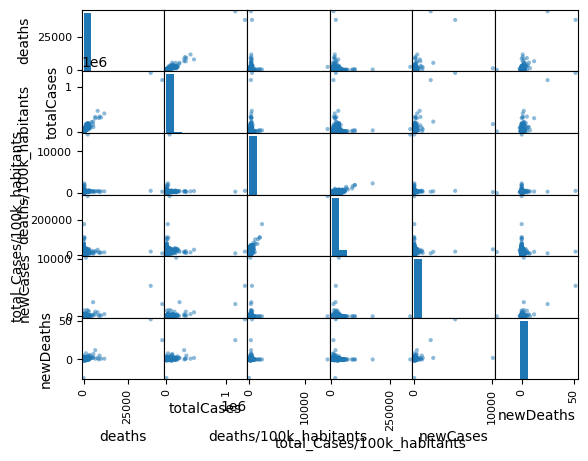

In [60]:
# gráfico tipo 'scatter plot' para verificar correlações entre as variáveis
pd.plotting.scatter_matrix(dataset)
plt.show()


# 2 - Divisão dos dados

Criando dois conjuntos de dados para serem utilizados nas etapas seguintes, treinamento e avaliação.

<div>
<br/>
<img src="https://github.com/rafaelmm82/ufpb-ia-20201/raw/master/02-fundamentos_de_ia/02_aula_pratica_classificacao_iris/03_divisao_dados.jpg", width="640"/>
</div>

In [40]:
pip install model_selection

Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [61]:

# carregando uma função pertencente ao scikit-learn para realizar
# automaticamente uma amostragem sem reposição aleatória e dividir
# os dados em dois conjuntos
from sklearn.model_selection import train_test_split

# importante lembrar que as 4 primeiras colunas são o nosso 'X'
# ou seja, os dados de entrada do modelo, e que a última coluna
# é o nosso 'y', ou seja, o dado que o modelo deve aprender a predizer
print('exemplo de entrada (x):\n', dataset.iloc[4, :8])
print('exemplo de saída (y):\n', dataset.iloc[4, 8])

exemplo de entrada (x):
 country                            Brazil
state                                  CE
city                            Acaraú/CE
deaths                                121
totalCases                           8162
deaths/100k_habitants           190.38328
total_Cases/100k_habitants    12842.21789
newCases                                7
Name: 18, dtype: object
exemplo de saída (y):
 0


In [63]:

from sklearn.preprocessing import LabelEncoder
# criando os dados de entrada e saída para treinamento e validação
# usando o método 'values' ele retorna um array bidimensional
# para serem inseridos na função train_test_split
array = dataset.values
print(type(array))

X = array[:, 3:8]
le = LabelEncoder()
y = le.fit_transform(array[:, 1])

print("dimensoes de X", X.shape)
print("dimensoes de y", y.shape)

<class 'numpy.ndarray'>
dimensoes de X (2128, 5)
dimensoes de y (2128,)


In [64]:

# utilizando um critério de divisão percentual 20% na função train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# olhando alguns dados referentes aos conjuntos
print(f'\n dimensao de X_train {X_train.shape} e y_train {y_train.shape}')
print(f'\n dimensao de X_test {X_test.shape} e y_train {y_test.shape}')


 dimensao de X_train (1702, 5) e y_train (1702,)

 dimensao de X_test (426, 5) e y_train (426,)


In [65]:

# Exemplo: dataframe com coluna "label" que indica a classe
print(dataset['state'].value_counts())
print(dataset['state'].value_counts(normalize=True))  # porcentagem


state
RS    327
SP    326
PR    217
BA    147
GO    143
SC    124
CE    113
PE    101
TO     85
RJ     78
ES     70
PA     70
PB     54
PI     51
MS     43
AM     37
AL     32
RO     30
RN     25
MA     24
AC     10
RR     10
AP      8
SE      3
Name: count, dtype: int64
state
RS    0.153665
SP    0.153195
PR    0.101974
BA    0.069079
GO    0.067199
SC    0.058271
CE    0.053102
PE    0.047462
TO    0.039944
RJ    0.036654
ES    0.032895
PA    0.032895
PB    0.025376
PI    0.023966
MS    0.020207
AM    0.017387
AL    0.015038
RO    0.014098
RN    0.011748
MA    0.011278
AC    0.004699
RR    0.004699
AP    0.003759
SE    0.001410
Name: proportion, dtype: float64


# 3 - Treinamento do Modelo

Definindo um modelo e realizando o treinamento

<div>
<img src="https://github.com/rafaelmm82/ufpb-ia-20201/raw/master/02-fundamentos_de_ia/02_aula_pratica_classificacao_iris/04_treinamento_modelo.jpg", width="640"/>
</div>

In [66]:
# carregando a classe pra criar um modelo do scikit-learn
from sklearn.svm import SVC

# instanciando um objeto do modelo SVC com parâmetros padrões
model = SVC(gamma='auto')


In [67]:
print(X_train[0])  # ou print(X_train[:5])


[15 1365 248.96266 22655.60166 1]


In [68]:
model.fit(X_train, y_train)  # treinando o modelo com os dados de entrada e saída

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [69]:
# executa o método, a partir de um de treinamento 'fit', para ajustar os parâmetros
# do modelo algoritmo de aprendizagem, em função
# dos valores contidos no conjunto de dados
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# realizando as predições utilizando o conjunto de testes
prediction = model.predict(X_test)


In [70]:
model.fit(X_train, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


# 4 - Avaliação do Modelo

Utilizando o conjunto de dados de teste define-se uma métrica estatística de
avaliação e deduz-se a qualidade do resultado do treinamento

<div>
<br/>
<img src="https://github.com/rafaelmm82/ufpb-ia-20201/raw/master/02-fundamentos_de_ia/02_aula_pratica_classificacao_iris/05_avaliacao_modelo.jpg", width="640"/>
<div/>

In [71]:
# carregando funções da biblioteca scikit-learn que auxiliam no cálculo
# das avaliações dos modelos
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# realizando as predições utilizando o conjunto de testes
prediction = model.predict(X_test)


In [72]:
# para efeitos de comparação e devido ao fato do conjunto ser pequeno
# podemos observar visualmente o resultdo da predição e o valor real do dataset
print("Valores preditos:\n", prediction)
print("Valores esperado:\n", y_test)
print("Comparativo:\n", y_test == prediction)


Valores preditos:
 [19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 1

In [73]:
# usando funções e métricas mais robustas para avaliar o desempenho
# exibindo a acurácia do modelo para este treinamento
print("Acurácio do modelo:\n", accuracy_score(y_test, prediction))

Acurácio do modelo:
 0.1572769953051643


In [ ]:
# exibindo a matrix confusão VP, FP, VN FN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#
#cm = confusion_matrix(y_test, prediction)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#disp.plot(cmap='Blues')
#plt.title('Matriz de Confusão')
#plt.bar(range(26), 'totalCases')
#plt.xticks(range(26), 'city')
#plt.show()

KeyboardInterrupt: 

In [ ]:
# exibindo um relatório mais completo com os índices:
# precisão, recall, f1-score e support


## Qual conclusão podemos tirar do processo de treinamento?

E se, por exemplo, tivéssemos usado outros valores para divisão dos dados?

In [ ]:
# para avaliar o que aconteceria se tivéssemos utilizado outra propoção de dados
# para treino e validação podemos refazer parte do procedimento

# Cria novamente o modelo, treina, prediz e avalia
